In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

import xarray as xr

zarr_path = "/user/ab5405/summeraliaclimate/data/ACCESS-ESM1-5/tasdmgfparams_day_ACCESS-ESM1-5_ssp245_r10i1p1f1_ALLGWLS_projQDM-baseERA5-025_dwnsclQPLAD-target025deg_CONUS.zarr"
ds = xr.open_zarr(zarr_path)
print(ds)


<xarray.Dataset> Size: 28MB
Dimensions:          (bin_f: 22, bnds: 2, lat: 120, lon: 268, gwl: 5)
Coordinates:
  * bin_f            (bin_f) float64 176B 254.0 256.8 259.5 ... 309.5 312.3
  * bnds             (bnds) int64 16B 0 1
  * gwl              (gwl) float64 40B 0.61 1.0 1.5 2.0 2.5
  * lat              (lat) float64 960B 23.12 23.38 23.62 ... 52.38 52.62 52.88
  * lon              (lon) float64 2kB -126.9 -126.6 -126.4 ... -60.38 -60.12
Data variables:
    bin_bnds_behrer  (bin_f, bnds) float64 352B dask.array<chunksize=(22, 2), meta=np.ndarray>
    bins_behrer      (lat, lon, gwl, bin_f) float64 28MB dask.array<chunksize=(120, 268, 1, 22), meta=np.ndarray>
Attributes:
    DESCRIPTION:  tasdmgfparams files, subset to CONUS and just F bins
    SOURCE:       deela transfer_for_alia.ipynb


In [5]:
print(ds.attrs)


{'DESCRIPTION': 'tasdmgfparams files, subset to CONUS and just F bins', 'SOURCE': 'deela transfer_for_alia.ipynb'}


In [6]:
print(ds.dims)

FrozenMappingWarningOnValuesAccess({'bin_f': 22, 'bnds': 2, 'lat': 120, 'lon': 268, 'gwl': 5})


In [7]:
print(ds['bin_f'])              
print(ds['bin_f'].values)      
print(ds['bins_behrer'].dims)   


<xarray.DataArray 'bin_f' (bin_f: 22)> Size: 176B
array([253.983333, 256.761111, 259.538889, 262.316667, 265.094444, 267.872222,
       270.65    , 273.427778, 276.205556, 278.983333, 281.761111, 284.538889,
       287.316667, 290.094444, 292.872222, 295.65    , 298.427778, 301.205556,
       303.983333, 306.761111, 309.538889, 312.316667])
Coordinates:
  * bin_f    (bin_f) float64 176B 254.0 256.8 259.5 262.3 ... 306.8 309.5 312.3
[253.98333333 256.76111111 259.53888889 262.31666667 265.09444444
 267.87222222 270.65       273.42777778 276.20555556 278.98333333
 281.76111111 284.53888889 287.31666667 290.09444444 292.87222222
 295.65       298.42777778 301.20555556 303.98333333 306.76111111
 309.53888889 312.31666667]
('lat', 'lon', 'gwl', 'bin_f')


In [8]:
from funcs_support import get_params,get_filepaths

df = get_filepaths(source_dir = 'extracted')
print(df)

         varname freq          model     exp        run      gwl proj_method  \
0  tasdmgfparams  day  ACCESS-ESM1-5  ssp245  r10i1p1f1  ALLGWLs         QDM   

  proj_base dwnscl_method dwnscl_target suffix filetype  \
0  ERA5-025         QPLAD        025deg  CONUS     zarr   

                                                path  
0  /user/ab5405/summeraliaclimate/data/ACCESS-ESM...  


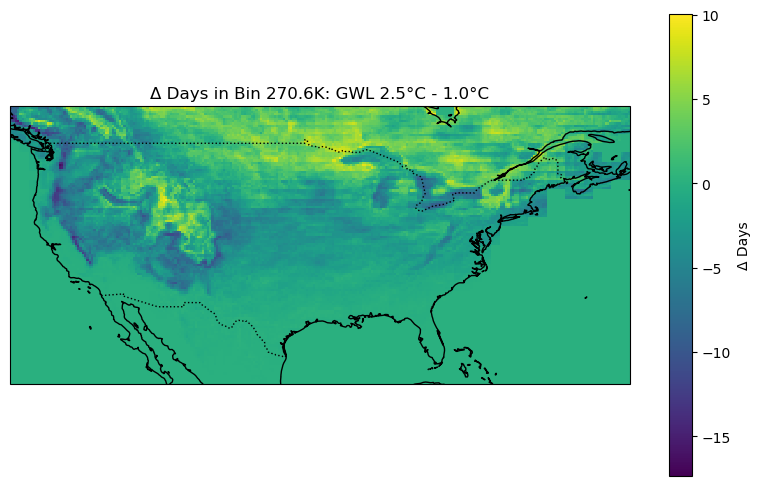

In [30]:
gwl_25 = ds.bins_behrer.sel(gwl=2.5, bin_f=ds['bin_f'][6])
gwl_10 = ds.bins_behrer.sel(gwl=1.0, bin_f=ds['bin_f'][6])

change = gwl_25 - gwl_10

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
pc = ax.pcolormesh(ds['lon'], ds['lat'], change, transform=ccrs.PlateCarree(), shading='auto')

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f"Δ Days in Bin {ds['bin_f'][6].values:.1f}K: GWL 2.5°C - 1.0°C")
plt.colorbar(pc, ax=ax, label='Δ Days')
plt.show()


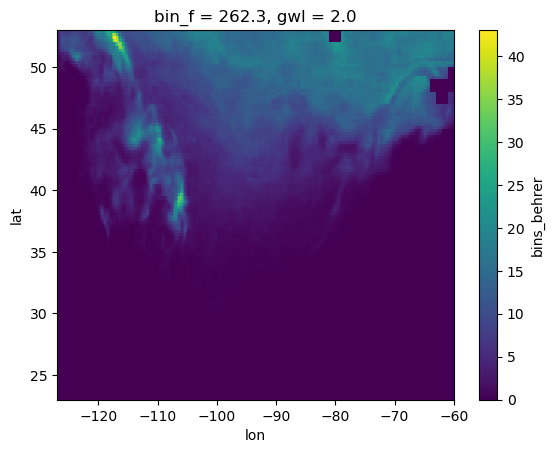

In [14]:
ds['bins_behrer'].sel(gwl=2.0, bin_f=ds['bin_f'][3]).plot()


In [15]:
xr.open_dataset(zarr_path)

<xarray.Dataset> Size: 28MB
Dimensions:          (bin_f: 22, bnds: 2, lat: 120, lon: 268, gwl: 5)
Coordinates:
  * bin_f            (bin_f) float64 176B 254.0 256.8 259.5 ... 309.5 312.3
  * bnds             (bnds) int64 16B 0 1
  * gwl              (gwl) float64 40B 0.61 1.0 1.5 2.0 2.5
  * lat              (lat) float64 960B 23.12 23.38 23.62 ... 52.38 52.62 52.88
  * lon              (lon) float64 2kB -126.9 -126.6 -126.4 ... -60.38 -60.12
Data variables:
    bin_bnds_behrer  (bin_f, bnds) float64 352B ...
    bins_behrer      (lat, lon, gwl, bin_f) float64 28MB ...
Attributes:
    DESCRIPTION:  tasdmgfparams files, subset to CONUS and just F bins
    SOURCE:       deela transfer_for_alia.ipynb

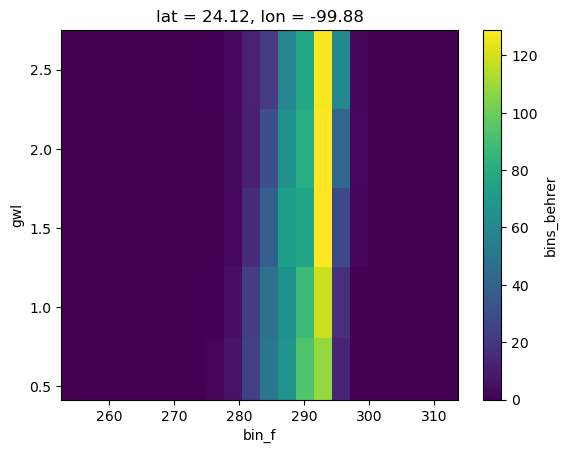

In [31]:
ds.bins_behrer.sel(lon=-100,lat=24,method='nearest').plot()

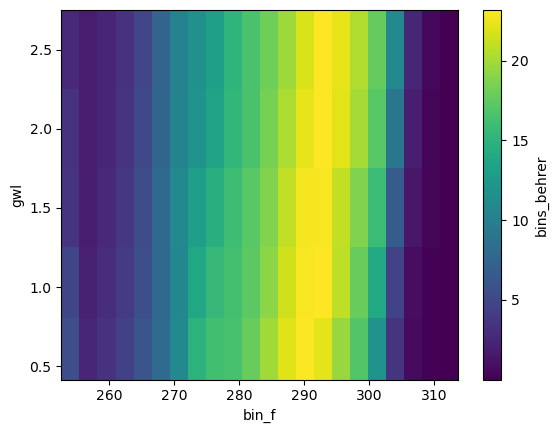

In [34]:
# This will plot the average time series over all lat/lon points
# Note that, if your data is on a normal rectangular grid (even
# lat/lon spacings), you will need to weight your data to account
# for the changing size of the pixels with latitude

import numpy as np
weights = np.cos(np.deg2rad(ds.lat))
ds.bins_behrer.weighted(weights).mean(('lat','lon')).plot()b